In [1]:
import matplotlib

from sectional_v2.data_info import get_nice_name_case
from sectional_v2.util.imports.import_fields_xr_v2 import import_constants
from sectional_v2.util.imports.get_fld_fixed import get_field_fixed
from useful_scit.imps import (np, xr, plt, pd)

# load and autoreload
from IPython import get_ipython

# noinspection PyBroadException
from sectional_v2.util.naming_conventions import var_info
from sectional_v2.util.naming_conventions.var_info import get_fancy_var_name

try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME/
/home/ubuntu/mnts/nird/projects/SECTIONAL_v2/sectional_v2/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model = 'NorESM'

In [3]:

from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders

plot_path = get_plotpath('comparison') + '/scatter/'
print(plot_path)
make_folders(plot_path)

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/


In [4]:
from_time = '2008-01'
to_time = '2008-12'
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = False  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
#if avg_over_lev:
#    pressure_adjust = True
p_levels = [1013.,900., 800., 700., 600.]  # used if not avg

lev_lim =0.

In [5]:

cases_sec = ['SECTv21_ctrl_koagD']#, 'PD_SECT_CHC7_diurnal']  # Sect ac eq.20, corr NPF diam, fxdt, vdiam, 1.5xBVOC']
cases_orig = ['noSECTv21_ox_ricc_dd']  # , 'Original eq.18','Original eq.20, 1.5xBVOC','Original eq.20, rednuc']
#cases_orig = ['noSECTv21_default_dd']  # , 'Original eq.18','Original eq.20, 1.5xBVOC','Original eq.20, rednuc']
cases = cases_orig + cases_sec

In [6]:
var_subl = ['NCONC01', 'H2SO4','SOA_LV','N_AER','COAGNUCL','NUCLRATE','GR','FORMRATE']#,'SOA_NA','SO4_NA']

In [7]:
var1 = var_subl[0]
var2 = var_subl[1]
cases_dic ={}
for case in cases:
    dummy = get_field_fixed(case,
                            var_subl,
                            from_time, to_time,
                            pressure_adjust=pressure_adjust)
    print(dummy)
    ds_constants = import_constants(case)
    
    dummy = xr.merge([dummy, ds_constants])
    cases_dic[case] = dummy.copy()

<xarray.DataArray 'time' (time: 12)>
array([396., 425., 456., 486., 517., 547., 578., 609., 639., 670., 700., 731.])
Coordinates:
  * time     (time) float64 396.0 425.0 456.0 486.0 ... 639.0 670.0 700.0 731.0
Attributes:
    long_name:  time
    units:      days since 2007-01-01 00:00:00
    calendar:   gregorian
    bounds:     time_bnds
<xarray.DataArray 'time' (time: 12)>
array(['2008-01-17T00:00:00.000000000', '2008-02-15T00:00:00.000000000',
       '2008-03-17T00:00:00.000000000', '2008-04-16T00:00:00.000000000',
       '2008-05-17T00:00:00.000000000', '2008-06-16T00:00:00.000000000',
       '2008-07-17T00:00:00.000000000', '2008-08-17T00:00:00.000000000',
       '2008-09-16T00:00:00.000000000', '2008-10-17T00:00:00.000000000',
       '2008-11-16T00:00:00.000000000', '2008-12-17T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2008-01-17 2008-02-15 ... 2008-12-17
Attributes:
    long_name:  time
    bounds:     time_bnds
Returnin

In [8]:
# select values close to surface:
for case in cases:
    _ds = cases_dic[case]
    _ds = _ds.sel(lev=slice(lev_lim,None))#sel(lev=slice(20,None))
    cases_dic[case] = _ds

In [9]:
for var in ['H2SO4','SOA_LV']:
    for case in cases:
        _ds = cases_dic[case]
        _ds.load()
        if _ds[var].units=='mol/mol':
            _ds[var] = _ds[var]*1e12
            _ds[var].attrs['units']='ppt'
var = var1

dummy
case_sec = cases_sec[0]
case_orig = cases_orig[0]
ds_diff = (cases_dic[case_sec]- cases_dic[case_orig])#.isel(lev=slice(20,None))
for var in var_subl:
    ds_diff[var+'_'+case_sec] = cases_dic[case_sec][var]#.isel(lev=slice(20,None))
    ds_diff[var+'_'+case_orig] = cases_dic[case_orig][var]#.isel(lev=slice(20,None))
ds_diff.load()
for var in var_subl:
    for case in cases:
        ds_diff[f'log{var}_{case}'] = np.log10(ds_diff[f'{var}_{case}'])#+'_'+ case_orig])

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [10]:
ds_diff

<xarray.Dataset>
Dimensions:                           (ilev: 33, lat: 96, lev: 32, lon: 144, time: 12, zlon: 1)
Coordinates:
  * lat                               (lat) float64 -90.0 -88.11 ... 88.11 90.0
  * zlon                              (zlon) float64 0.0
  * ilev                              (ilev) float64 2.255 5.032 ... 985.1 1e+03
  * lon                               (lon) float64 -180.0 -177.5 ... 177.5
  * lev                               (lev) float64 3.643 7.595 ... 976.3 992.6
  * time                              (time) datetime64[ns] 2008-01-17 ... 2008-12-17
Data variables:
    gw                                (time, lat) float64 0.0 0.0 ... 0.0 0.0
    hyam                              (time, lev) float64 0.0 0.0 ... 0.0 0.0
    hybm                              (time, lev) float64 0.0 0.0 ... 0.0 0.0
    P0                                (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    hyai                              (time, ilev) float64 0.0 0.0 ... 0.0 0.0
    hybi                              (time, ilev) float64 0.0 0.0 ... 0.0 0.0
    COAGNUCL                          (time, lev, lat, lon) float32 1.5822774e-10 ... 4.9473783e-07
    FORMRATE                          (time, lev, lat, lon) float32 0.0 ... -2.4149206e-06
    GR                                (time, lev, lat, lon) float32 -3.7136008e-09 ... -0.009405313
    H2SO4                             (time, lev, lat, lon) float32 -9.818709e-07 ... -0.008470617
    NCONC01                           (time, lev, lat, lon) float32 0.00018067565 ... 2.727397
    NUCLRATE                          (time, lev, lat, lon) float32 0.0 ... -7.798093e-06
    N_AER                             (time, lev, lat, lon) float32 0.00017176615 ... 2.6054964
    PS                                (time, lat, lon) float32 2.8203125 ... 2.046875
    SOA_LV                            (time, lev, lat, lon) float32 5.777273e-17 ... -5.6241497e-05
    lat_wg                            (time, lat) float64 0.0 0.0 ... 0.0 0.0
    GRIDAREA                          (lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    LANDFRAC                          (lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    NCONC01_SECTv21_ctrl_koagD        (time, lev, lat, lon) float32 0.005897758 ... 4.715578
    NCONC01_noSECTv21_ox_ricc_dd      (time, lev, lat, lon) float32 0.0057170824 ... 1.9881812
    H2SO4_SECTv21_ctrl_koagD          (time, lev, lat, lon) float32 9.118869e-07 ... 0.004716578
    H2SO4_noSECTv21_ox_ricc_dd        (time, lev, lat, lon) float32 1.8937578e-06 ... 0.013187195
    SOA_LV_SECTv21_ctrl_koagD         (time, lev, lat, lon) float32 9.056081e-15 ... 1.0616127e-07
    SOA_LV_noSECTv21_ox_ricc_dd       (time, lev, lat, lon) float32 8.998308e-15 ... 5.6347657e-05
    N_AER_SECTv21_ctrl_koagD          (time, lev, lat, lon) float32 0.0058392663 ... 13.6576395
    N_AER_noSECTv21_ox_ricc_dd        (time, lev, lat, lon) float32 0.0056675 ... 11.052143
    COAGNUCL_SECTv21_ctrl_koagD       (time, lev, lat, lon) float32 1.765669e-10 ... 5.298466e-07
    COAGNUCL_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 1.8339157e-11 ... 3.510874e-08
    NUCLRATE_SECTv21_ctrl_koagD       (time, lev, lat, lon) float32 0.0 ... 1.6616399e-05
    NUCLRATE_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 0.0 ... 2.4414492e-05
    GR_SECTv21_ctrl_koagD             (time, lev, lat, lon) float32 3.5487149e-09 ... 0.0051941024
    GR_noSECTv21_ox_ricc_dd           (time, lev, lat, lon) float32 7.2623156e-09 ... 0.0145994155
    FORMRATE_SECTv21_ctrl_koagD       (time, lev, lat, lon) float32 0.0 ... 2.6216328e-06
    FORMRATE_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 0.0 ... 5.0365534e-06
    logNCONC01_noSECTv21_ox_ricc_dd   (time, lev, lat, lon) float32 -2.2428255 ... 0.29845598
    logNCONC01_SECTv21_ctrl_koagD     (time, lev, lat, lon) float32 -2.2293131 ... 0.6735349
    logH2SO4_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 -5.7226753 ... -1.8798475
    logH2SO4_SECTv21_ct

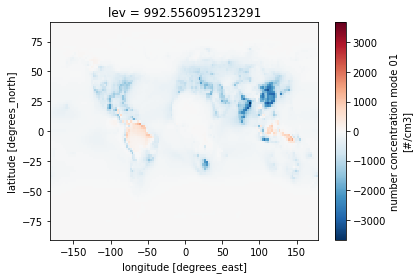

In [11]:
ds_diff['NCONC01'].mean('time').isel(lev=-1).plot()
plt.show()

In [12]:
import matplotlib.colors as colors

In [13]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
def _plt_2dhist(ds_diff, xvar, yvar, nr_bins=40, yscale='symlog', xscale='log',
                xlim = [1e-6,1e-2],ylim=[5.,1e3], ax=None):
    """
    xvar = f'NUCLRATE_{case_orig}'
    yvar='NCONC01'
    xlim = [1e-6,1e-2]
    ylim=[1,1e3]
    nr_bins = 40
    yscale='symlog'
    xscale='log'
    """
    varList = [xvar, yvar]#f'NUCLRATE_{case_orig}',f'logNUCLRATE_{case_orig}',f'logSOA_LV_{case_orig}',f'logH2SO4_{case_orig}',f'logNCONC01_{case_orig}',f'logN_AER_{case_orig}',f'N_AER_{case_orig}',f'H2SO4_{case_orig}','NCONC01']
    dims = tuple(ds_diff[varList].dims)
    _ds_s = ds_diff[varList].stack(ind=dims)#('lat','lon','lev','time'))


    ybins = mk_bins(ylim[0], vmax = ylim[1], nr_bins=nr_bins, scale=yscale)
    xbins = mk_bins(xlim[0],vmax=xlim[1], nr_bins=nr_bins, scale=xscale)
    data=_ds_s.to_dataframe()
    lim=0
    #data = -data[(data['NCONC01']<lim)]# | (data['NCONC01']>=lim)]
    x=data[xvar]#f'NUCLRATE_{case_orig}']
    y=data[yvar]#'NCONC01']
    if ax is None:
        fig, ax = plt.subplots(1)
    h =ax.hist2d(x,y,bins=[xbins,ybins], cmap='Reds')#,extent=[-3,3,-300,20],yscale='symlog')

    plt.colorbar(h[3], ax=ax, format = OOMFormatter(4, mathText=False))

    #cb = fig.colorbar(c, ax=ax)
    if yscale=='symlog':
        ax.set_yscale('symlog', linthreshy=ylim[0], linscaley=ylim[0]/10,subsy=[2,3,4,5,6,7,8,9])
        yt = ax.get_yticks()
        ml = np.abs(yt[yt!=0]).min()
        ytl = yt
        ytl[(yt==ml)|(yt==-ml)]=None
        ax.set_yticks(ticks=yt)#[y for y in yt if y!=0])#,
        ax.set_yticklabels(ytl)#[-1e2,-1e1,-1e0,1e0,1e1,1e2])

    #ax.set_yticks([y for y in yt if y!=0])#[-1e2,-1e1,-1e0,1e0,1e1,1e2])
    ax.set_xscale('log')
    return ax
    #plt.show()

def mk_bins(v, vmax = 1e3, nr_bins=20, scale='symlog'):
    if scale=='symlog':
        ybins = np.geomspace(v, vmax, int(nr_bins)/2)
        ybins = ybins - ybins[0]
        ybins = [*-ybins[::-1], *ybins[1:]]
    elif scale=='log':
        ybins = np.geomspace(v, vmax, nr_bins)
    elif scale=='neglog':
        ybins = -np.geomspace(v, vmax, nr_bins)[::-1]
    elif scale=='linear':
        ybins=np.linspace(v, vmax, nr_bins)

    return ybins


class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

In [14]:
from useful_scit.plot.fig_manip import subp_insert_abc

In [15]:
import seaborn as sns

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'symscale'. In the future this will raise TypeError
  # Remove the CWD from sys.path while we load stuff.


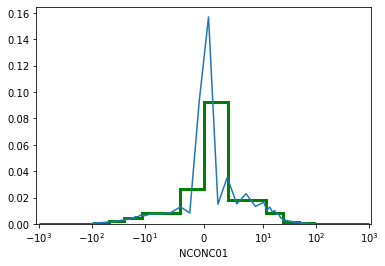

In [16]:
v=5
dims = tuple(ds_diff['NCONC01'].dims)
_df = ds_diff['NCONC01'].stack(ind=dims).to_dataframe()
_df = _df[(_df['NCONC01']>-100)&(_df['NCONC01']<100)]
xbins = mk_bins(v, vmax = 1e3, nr_bins=20, scale='symlog')

sns.distplot( _df['NCONC01'], hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"}, bins=xbins)

plt.xscale('symlog', linthreshx=v*2, symscale=v)

## Main plot:

NUCLRATE
GR
H2SO4
SOA_LV
N_AER
COAGNUCL


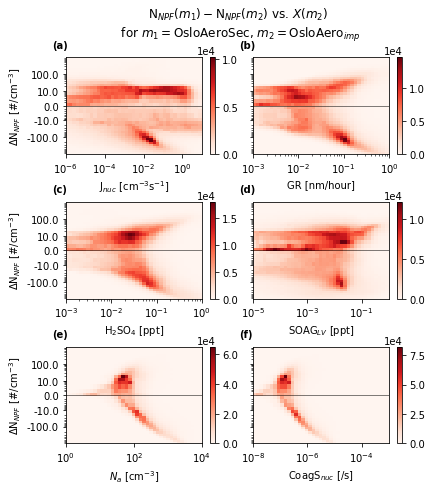

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl_koagD.


In [17]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','N_AER','COAGNUCL']
lev_min=100.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## masked by height

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


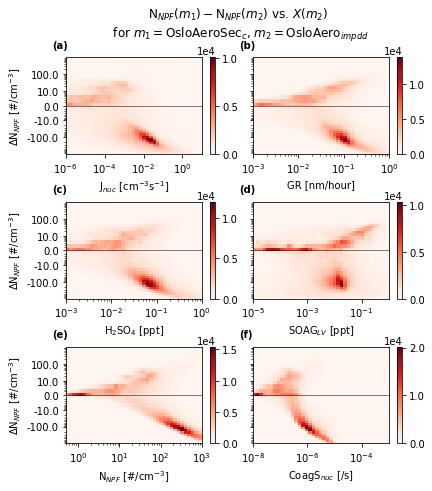

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl_koagD.


In [18]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=800
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


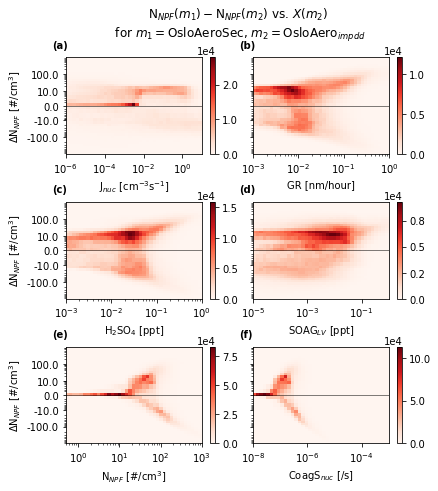

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [33]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=800
_ds = ds_diff.sel(lev=slice(None,lev_min))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

## Mask by COAGS?

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


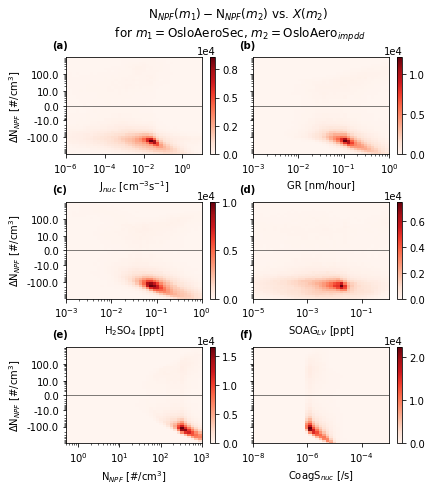

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [34]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=950
_coag_ctrl = ds_diff[f'COAGNUCL_{case_orig}']
_ds = ds_diff.where(_coag_ctrl>1e-6)#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


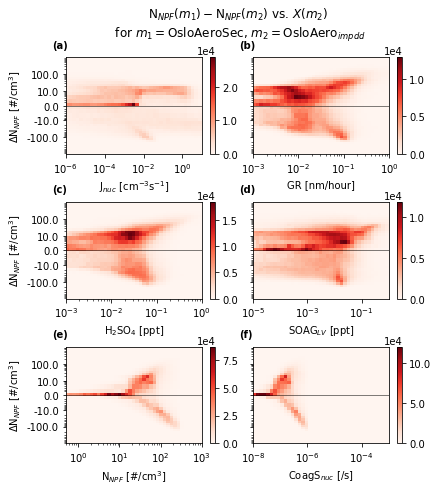

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [35]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=950
_coag_ctrl = ds_diff[f'COAGNUCL_{case_orig}']
_gr_ctrl = ds_diff[f'GR_{case_orig}']
_ds = ds_diff.where((_coag_ctrl<1e-6) )#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,#yscale='linear',ylim=[-50,50],
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

In [36]:
ds_diff

<xarray.Dataset>
Dimensions:                           (ilev: 33, lat: 96, lev: 32, lon: 144, time: 12, zlon: 1)
Coordinates:
  * lon                               (lon) float64 -180.0 -177.5 ... 177.5
  * lat                               (lat) float64 -90.0 -88.11 ... 88.11 90.0
  * ilev                              (ilev) float64 2.255 5.032 ... 985.1 1e+03
  * lev                               (lev) float64 3.643 7.595 ... 976.3 992.6
  * zlon                              (zlon) float64 0.0
  * time                              (time) datetime64[ns] 2008-01-17 ... 2008-12-17
Data variables:
    gw                                (time, lat) float64 0.0 0.0 ... 0.0 0.0
    hyam                              (time, lev) float64 0.0 0.0 ... 0.0 0.0
    hybm                              (time, lev) float64 0.0 0.0 ... 0.0 0.0
    P0                                (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    hyai                              (time, ilev) float64 0.0 0.0 ... 0.0 0.0
    hybi                              (time, ilev) float64 0.0 0.0 ... 0.0 0.0
    COAGNUCL                          (time, lev, lat, lon) float32 1.1522019e-10 ... 3.603386e-07
    FORMRATE                          (time, lev, lat, lon) float32 0.0 ... -1.8872672e-06
    GR                                (time, lev, lat, lon) float32 -2.2703768e-09 ... -0.009546759
    H2SO4                             (time, lev, lat, lon) float32 -6.002098e-07 ... -0.00860293
    NCONC01                           (time, lev, lat, lon) float32 0.00021677138 ... 2.750648
    NUCLRATE                          (time, lev, lat, lon) float32 0.0 ... -9.8990995e-06
    N_AER                             (time, lev, lat, lon) float32 0.00020493288 ... 2.6899548
    PS                                (time, lat, lon) float32 0.265625 ... 2.7265625
    SOA_LV                            (time, lev, lat, lon) float32 -4.9818497e-16 ... -5.625798e-05
    lat_wg                            (time, lat) float64 0.0 0.0 ... 0.0 0.0
    GRIDAREA                          (lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    LANDFRAC                          (lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    NCONC01_SECTv21_ctrl              (time, lev, lat, lon) float32 0.005933854 ... 4.738829
    NCONC01_noSECTv21_ox_ricc_dd      (time, lev, lat, lon) float32 0.0057170824 ... 1.9881812
    H2SO4_SECTv21_ctrl                (time, lev, lat, lon) float32 1.293548e-06 ... 0.0045842645
    H2SO4_noSECTv21_ox_ricc_dd        (time, lev, lat, lon) float32 1.8937578e-06 ... 0.013187195
    SOA_LV_SECTv21_ctrl               (time, lev, lat, lon) float32 8.500123e-15 ... 8.967731e-08
    SOA_LV_noSECTv21_ox_ricc_dd       (time, lev, lat, lon) float32 8.998308e-15 ... 5.6347657e-05
    N_AER_SECTv21_ctrl                (time, lev, lat, lon) float32 0.005872433 ... 13.742098
    N_AER_noSECTv21_ox_ricc_dd        (time, lev, lat, lon) float32 0.0056675 ... 11.052143
    COAGNUCL_SECTv21_ctrl             (time, lev, lat, lon) float32 1.3355934e-10 ... 3.9544733e-07
    COAGNUCL_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 1.8339157e-11 ... 3.510874e-08
    NUCLRATE_SECTv21_ctrl             (time, lev, lat, lon) float32 0.0 ... 1.4515393e-05
    NUCLRATE_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 0.0 ... 2.4414492e-05
    GR_SECTv21_ctrl                   (time, lev, lat, lon) float32 4.991939e-09 ... 0.0050526564
    GR_noSECTv21_ox_ricc_dd           (time, lev, lat, lon) float32 7.2623156e-09 ... 0.0145994155
    FORMRATE_SECTv21_ctrl             (time, lev, lat, lon) float32 0.0 ... 3.1492862e-06
    FORMRATE_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 0.0 ... 5.0365534e-06
    logNCONC01_noSECTv21_ox_ricc_dd   (time, lev, lat, lon) float32 -2.2428255 ... 0.29845598
    logNCONC01_SECTv21_ctrl           (time, lev, lat, lon) float32 -2.226663 ... 0.67567104
    logH2SO4_noSECTv21_ox_ricc_dd     (time, lev, lat, lon) float32 -5.7226753 ... -1.8798475
    logH2SO4_SECTv21_ctr

FORMRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


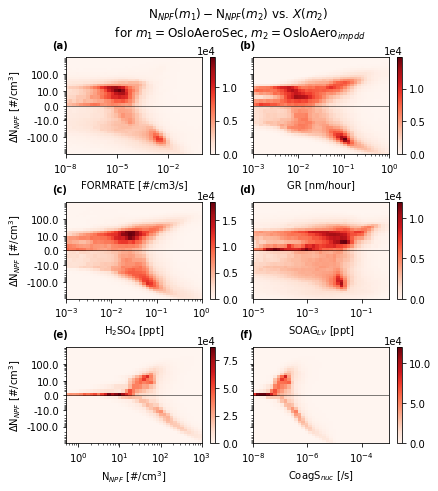

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [37]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['FORMRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=950
_coag_ctrl = ds_diff[f'COAGNUCL_{case_orig}']
_gr_ctrl = ds_diff[f'GR_{case_orig}']
_ds = ds_diff#.where((_coag_ctrl<1e-6))#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
    'FORMRATE':[1.e-8,1],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,#yscale='linear',ylim=[-50,50],
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

FORMRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


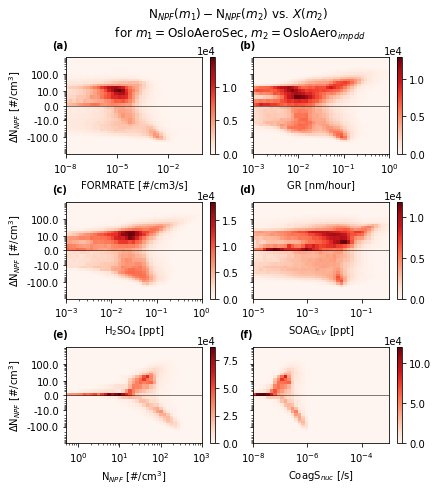

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [38]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['FORMRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=950
_coag_ctrl = ds_diff[f'COAGNUCL_{case_orig}']
_gr_ctrl = ds_diff[f'GR_{case_orig}']
_ds = ds_diff.where((_coag_ctrl<1e-6))#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
    'FORMRATE':[1.e-8,1],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,#yscale='linear',ylim=[-50,50],
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

FORMRATE
H2SO4
SOA_LV
N_AER
COAGNUCL
soa/h2SO4


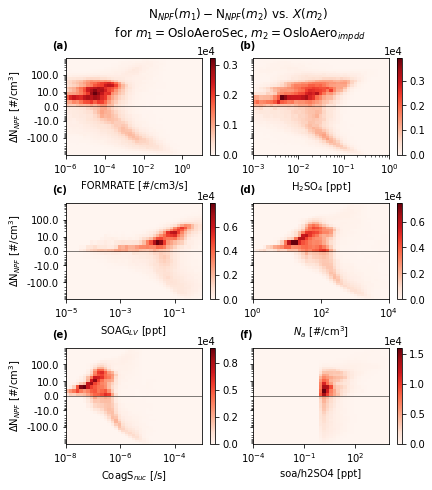

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [39]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['FORMRATE','H2SO4','SOA_LV','N_AER','COAGNUCL','soa/h2SO4']#_{case_orig}']
lev_min=950
_coag_ctrl = ds_diff[f'H2SO4_{case_orig}']
_gr_ctrl = ds_diff[f'SOA_LV_{case_orig}']
_ds = ds_diff.where((_coag_ctrl<_gr_ctrl))#sel(lev=slice(lev_min, None))
_ds[f'soa/h2SO4_{case_orig}'] = _ds[f'SOA_LV_{case_orig}']/_ds[f'H2SO4_{case_orig}']
_ds[f'soa/h2SO4'] = _ds[f'SOA_LV']/_ds[f'H2SO4']
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
    'FORMRATE':[1.e-6,10],
    'soa/h2SO4': [1e-4,1e4]
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,#yscale='linear',ylim=[-50,50],
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

FORMRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


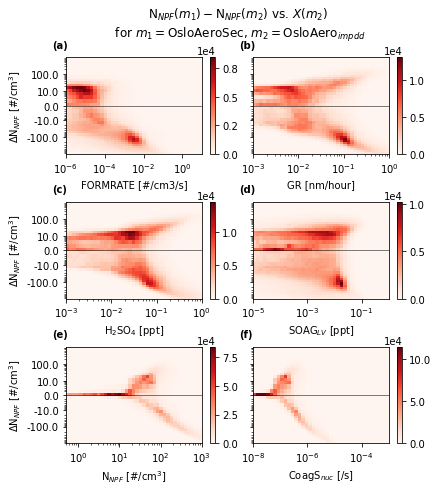

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [40]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['FORMRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=950
_coag_ctrl = ds_diff[f'H2SO4_{case_orig}']
_gr_ctrl = ds_diff[f'SOA_LV_{case_orig}']
_ds = ds_diff.where((_coag_ctrl>2*_gr_ctrl))#sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
    'FORMRATE':[1.e-6,10],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,#yscale='linear',ylim=[-50,50],
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

# swich base case:

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


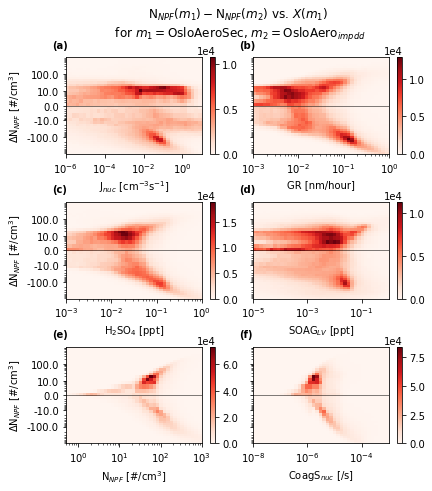

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_flip_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [41]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=100.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_sec}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_1)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_flip_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

NUCLRATE
GR
H2SO4
SOA_LV
N_AER
COAGNUCL


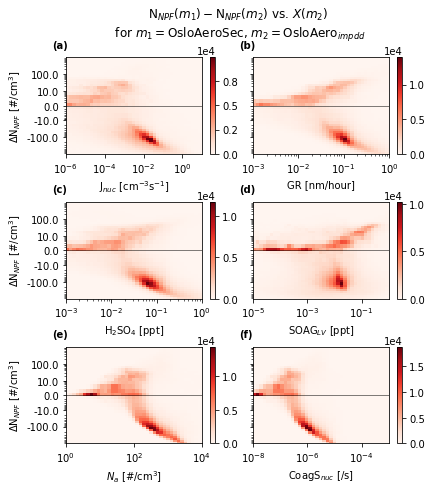

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [42]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','N_AER','COAGNUCL']
lev_min=800.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


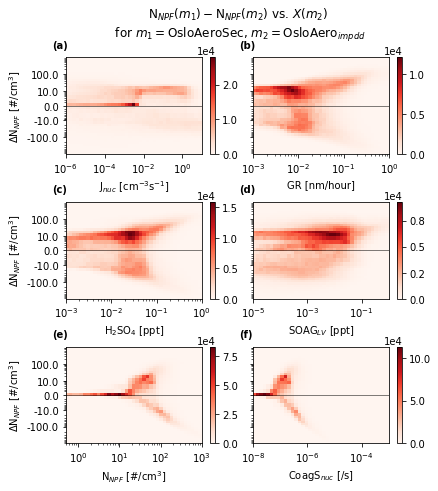

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [43]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=800.
_ds = ds_diff.sel(lev=slice( None,lev_min))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

NUCLRATE
GR
H2SO4
SOA_LV
NCONC01
COAGNUCL


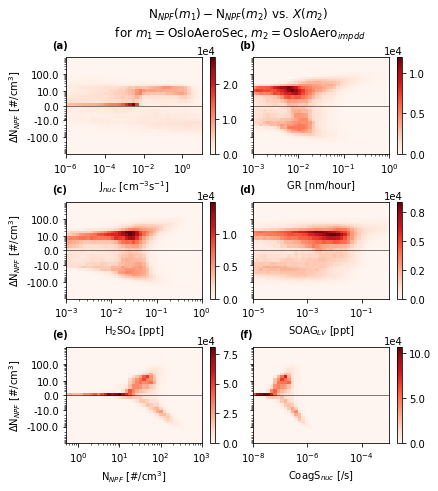

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/2dhist_noSECTv21_ox_ricc_dd_SECTv21_ctrl.


In [44]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','NCONC01','COAGNUCL']
lev_min=600.
_ds = ds_diff.sel(lev=slice( None,lev_min))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[5e-1,1e3],
    'COAGNUCL':[1e-8,1e-3],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    h = _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
    ax.plot(xlim,[0,0], linewidth=.5, c='k')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
    
subp_insert_abc(axs)

suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

In [45]:
import seaborn as sns

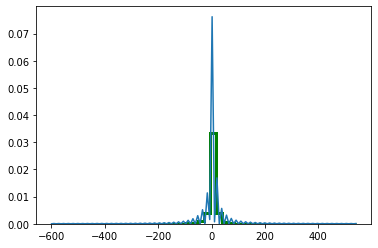

In [46]:
sns.distplot( _ds['NCONC01'].to_dataframe(), hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

NUCLRATE
GR
H2SO4
SOA_LV
N_AER
COAGNUCL


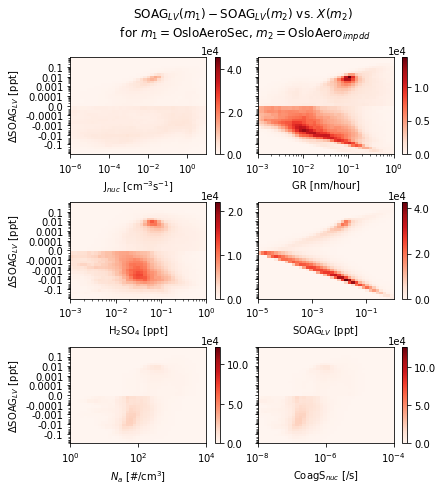

In [47]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','N_AER','COAGNUCL']
lev_min=900
_ds = ds_diff#.sel(lev=slice( lev_min,None))
var_diff = 'SOA_LV'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[1e0,1e4],
    'COAGNUCL':[1e-8,1e-4],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax, ylim=xlims[var_diff])
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()

NUCLRATE
GR
H2SO4
SOA_LV
N_AER
COAGNUCL


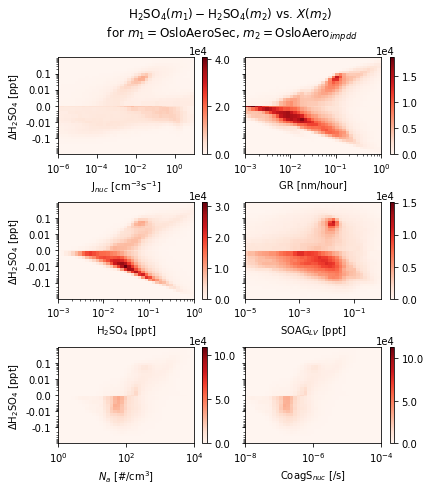

In [48]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','N_AER','COAGNUCL']
lev_min=900
_ds = ds_diff#.sel(lev=slice( lev_min,None))
var_diff = 'H2SO4'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[1e0,1e4],
    'COAGNUCL':[1e-8,1e-4],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax, ylim=xlims[var_diff])
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()

NUCLRATE
GR
H2SO4
SOA_LV
N_AER
COAGNUCL


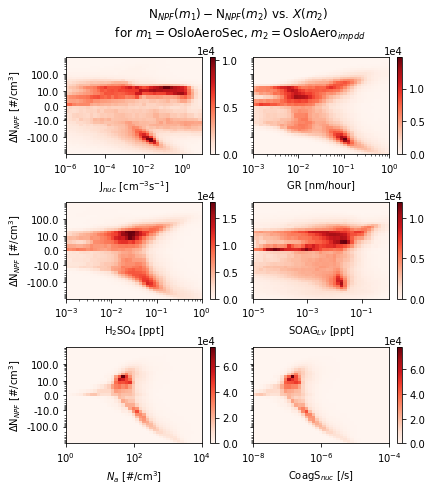

In [49]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','N_AER','COAGNUCL']
lev_min=100.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[1e0,1e4],
    'COAGNUCL':[1e-8,1e-4],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()

NUCLRATE
GR
H2SO4
SOA_LV
N_AER
COAGNUCL


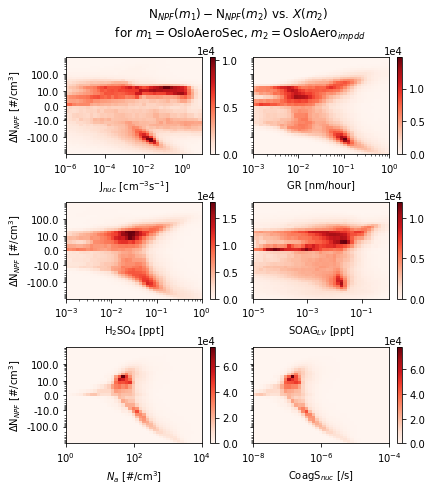

In [50]:
fig, axs = plt.subplots(3,2, figsize=[6.4,7.1], sharey=True)#, constrained_layout=True)
var_xl = ['NUCLRATE','GR','H2SO4','SOA_LV','N_AER','COAGNUCL']
lev_min=100.
_ds = ds_diff.sel(lev=slice(lev_min, None))
var_diff = 'NCONC01'
xlims = {
    'NUCLRATE' : [1.e-6,10],
    'H2SO4' : [1.e-3,1],
    'SOA_LV' : [1.e-5,1],
    'GR' : [1.e-3,1],
    'N_AER':[1e0,1e4],
    'NCONC01':[1e0,1e4],
    'COAGNUCL':[1e-8,1e-4],
}
for var,ax in zip(var_xl, axs.flatten()):
    print(var)
    xlim = xlims[var]
    _plt_2dhist(_ds,f'{var}_{case_orig}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax)
    uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
    ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')

uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
fvar_diff = get_fancy_var_name(var_diff)
ylab = f'$\Delta${fvar_diff} [{uni}]'
for ax in axs[:,0]:
    ax.set_ylabel(ylab)
suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_orig)} vs.  '
suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_orig)}'
fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
stit = fig.suptitle(suptit,  fontsize=12, y=.98)
fn = plot_path + f'2dhist_{case_orig}_{case_sec}.'
#fig.savefig(fn+'pdf',bbox_extra_artists=(stit,), bbox_inches='tight')
#fig.savefig(fn+'png',bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()